# NLP-Based Sentiment Analysis for Movie Review

## Objective
This project focuses on constructing a system to evaluate movie reviews, categorizing sentiments into positive or negative labels. By applying NLP and leveraging various machine learning algorithms, the aim is to ensure reliable and precise sentiment detection.

## Methodology
The project is structured into key phases to achieve its goals:

**Text Preprocessing and Cleansing:**

1. Dataset cleaning involves eliminating irrelevant components like HTML tags and symbols. The text is then converted to lowercase, and linguistic normalization techniques, such as stemming and lemmatization, are employed for consistency.

**Feature Engineering:**

2. Post-cleaning, the textual data is encoded into numerical representations through the TF-IDF method, which quantifies term significance. This transformation ensures efficient processing by machine learning algorithms.

**Model development and Evaluation:**

3. The dataset is analyzed using multiple classifiers like Naive Bayes, Logistic Regression, Decision Trees, Random Forests, and K-Nearest Neighbors. Their effectiveness is compared based on metrics such as accuracy to identify the most robust sentiment classifier.

**Model Optimization and Selection:**

4. A comparative assessment is conducted to identify the most accurate model, which is then selected for the final sentiment analysis deployment.

## Outcome
The project results in a thoroughly trained and validated sentiment analysis model, proficient in differentiating positive from negative reviews. Practical applications include enhancing movie recommendations, analyzing customer feedback, and monitoring sentiment trends across platforms.

## Implementation:
Prior to initiating the project, it's essential to install the requisite Python libraries and tools. These utilities assist in data preparation, visualization, model construction, and performance evaluation, ensuring a seamless workflow throughout the project.

Install necessary dependencies

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn joblib nltk

### Library Imports
The required libraries are imported to handle essential tasks such as data handling, visualization, text processing, and implementing machine learning algorithms throughout the project. (lib changedd

In [2]:
# Import essential libraries for data handling, analysis, and visualization
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

warnings.filterwarnings('ignore')

### Data Loading and Overview
Commence by loading the dataset to gain an initial understanding and prepare it for subsequent processing steps.

In [3]:
import pandas as pd  # Ensure pandas is imported

# Define the path dynamically
data_path = '/content/IMDB Dataset.csv'  # Change this to your path
imdb_reviews = pd.read_csv(data_path)  # Use pd.read_csv()

# Show a random 5 rows instead of always showing the top 5 rows
imdb_reviews.sample(5)


,review,sentiment
39771,"Normally, I do not review online, but it's Sat...",positive
37646,I will admit that I'm only a college student a...,negative
14525,This movie was not only disappointing to the h...,negative
23792,Hubie -- like Stanely the troll from Bluth's A...,negative
25859,"""Showtime"" is a funny film starring funnymen R...",positive


### Visualizing Class Distribution
Here, a bar chart is generated to depict the distribution of positive and negative reviews within the dataset, allowing for a quick assessment of class balance.


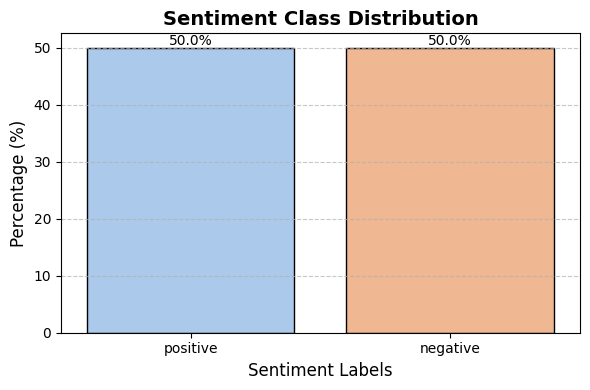

In [4]:
# Function to visualize the distribution of positive and negative reviews
def plot_sentiment_distribution(dataset, label_column):
    label_counts = dataset[label_column].value_counts()
    total_labels = len(dataset)
    label_percentages = (label_counts / total_labels * 100).round(2)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=label_percentages.index, y=label_percentages.values, palette="pastel", edgecolor='black')

    for index, percentage in enumerate(label_percentages):
        plt.text(index, percentage + 0.5, f"{percentage}%", ha='center', fontsize=10)

    plt.title('Sentiment Class Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Sentiment Labels', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot the sentiment distribution
plot_sentiment_distribution(imdb_reviews, 'sentiment')

## Data Cleaning and Preprocessing
This phase involves cleansing the text data by eliminating unwanted characters (e.g., HTML tags, special symbols, extra spaces), converting text to lowercase, and normalizing words to enhance machine learning model comprehension.

### Stopword Removal, Lemmatization, and Stemming:
We preprocess the text data by removing stopwords (common words like "is," "and," "the" that don’t add significant meaning), reducing words to their root forms using lemmatization, and simplifying them further with stemming. This helps in cleaning the text and standardizing it for better model performance.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re


In [6]:
# Import necessary libraries for lemmatization and stopwords
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download the required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer and stopwords set
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
# Updated text cleaning function
def clean_text(text):
    """
    Perform text preprocessing including:
    - Removing HTML tags
    - Removing special characters, numbers, and extra spaces
    - Converting to lowercase
    - Removing stopwords
    - Applying lemmatization
    """
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Removal of special characters and numbers keeping only alphabets and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Removing extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Converted to lowercase
    text = text.lower()

    # Tokenizing the text
    words = text.split()

    # Removing the stopwords and applying lemmatization
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Return the cleaned text
    return ' '.join(cleaned_words)

# Testing the update cleaning function
sample_review = "I loved this movie! It was amazing. Highly recommend it."
print("Sample cleaned text:", clean_text(sample_review))

Sample cleaned text: loved movie amazing highly recommend


In [8]:
# Apply the updated cleaning function to the 'review' column
imdb_reviews['cleaned_reviews'] = imdb_reviews['review'].apply(clean_text)

# Verify the result
print(imdb_reviews[['review', 'cleaned_reviews']].head())


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                     cleaned_reviews  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


### Vectorization
The cleaned text is transformed into numerical representations utilizing the TF-IDF technique, facilitating quantitative analysis by machine learning algorithms.

In [9]:
# To covert the text into numerical representation
from sklearn.feature_extraction.text import TfidfVectorizer

# Limit vocabulary to the top 5000 words
tfidf_encoder = TfidfVectorizer(max_features=5000)
review_vectors = tfidf_encoder.fit_transform(imdb_reviews['cleaned_reviews']).toarray() # Convert text to numerical representation

# Convert sentiment labels into numerical values (1 for positive, 0 for negative) for model training
sentiment_values = imdb_reviews['sentiment'].apply(lambda sentiment: 1 if sentiment == 'positive' else 0)

### Split Dataset
Dividing dataset into test and training

In [10]:
# Split data into training (80%) and testing (20%) sets
X_training_set, X_testing_set, y_training_labels, y_testing_labels = train_test_split(
    review_vectors, sentiment_values, test_size=0.2, random_state=42
)


### Reusable Function for Training and Evaluation:
This cell defines a function that trains a given model on the training data and evaluates its accuracy on the test data. By using this function, we avoid repeating the same code for each model, making the workflow cleaner and more efficient.


In [11]:
# Defining a reusable function to train and evaluate models efficiently
def fit_and_check_model(estimator, train_features, train_targets, test_features, test_targets):
    """
    Fit a machine learning model to the training set and measure its accuracy.

    Parameters:
    estimator: The machine learning model to fit.
    train_features, train_targets: The training dataset and labels.
    test_features, test_targets: The test dataset and corresponding labels.

    Returns:
    The accuracy rate of the model on the provided test set.
    """
    estimator.fit(train_features, train_targets) # Train the model
    test_predictions = estimator.predict(test_features) # Predict on test data
    return accuracy_score(test_targets, test_predictions) # Calculate accuracy


### Naive Bayes
This cell trains the Naive Bayes classifier on the training data and calculates its accuracy on the test data. Naive Bayes is a simple yet effective model for text classification tasks like sentiment analysis.


In [12]:
# Train and evaluate Naive Bayes
from sklearn.metrics import accuracy_score
nb_classifier = MultinomialNB()
nb_accuracy = fit_and_check_model(nb_classifier, X_training_set, y_training_labels, X_testing_set, y_testing_labels)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")


Naive Bayes Accuracy: 0.85


### Logistic Regression
Apply this linear classifier to the dataset and calculate performance metrics to validate its predictive strength.

In [13]:
# Train and evaluate Logistic Regression
from sklearn.metrics import accuracy_score
logistic_regression_classifier = LogisticRegression(random_state=42)
log_reg_accuracy = fit_and_check_model(logistic_regression_classifier, X_training_set, y_training_labels, X_testing_set, y_testing_labels)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")


Logistic Regression Accuracy: 0.88


### Decision Tree
This cell trains the Decision Tree model, a flexible classifier that splits data based on features to make predictions. The model's accuracy is then evaluated.

In [14]:
# Train and evaluate Decision Tree
from sklearn.metrics import accuracy_score

decision_tree_classifier = DecisionTreeClassifier(random_state=42)
dt_accuracy = fit_and_check_model(decision_tree_classifier, X_training_set, y_training_labels, X_testing_set, y_testing_labels)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")


Decision Tree Accuracy: 0.72


### Random Forest
This cell trains the Random Forest model, an ensemble method that combines multiple decision trees to improve accuracy. The model's performance on the test set is displayed.



In [15]:
# Train and evaluate Random Forest
from sklearn.metrics import accuracy_score
random_forest_classifier = RandomForestClassifier(random_state=42)
rf_accuracy = fit_and_check_model(random_forest_classifier, X_training_set, y_training_labels, X_testing_set, y_testing_labels)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 0.85


### K-Nearest Neighbors (KNN)
This cell trains the K-Nearest Neighbors model, which predicts the class of a sample based on its nearest neighbors in the feature space. The accuracy score is calculated and displayed.

In [16]:
# Train and evaluate KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import math

# Train and evaluate KNN
knn_classifier = KNeighborsClassifier(n_neighbors=int(math.sqrt(len(X_training_set))))
knn_accuracy = fit_and_check_model(knn_classifier, X_training_set, y_training_labels, X_testing_set, y_testing_labels)
print(f"KNN Model Accuracy: {knn_accuracy:.2f}")


KNN Model Accuracy: 0.81



## Model Comparison and Selection
At this step, we train multiple machine learning models and test their performance to find the best one. By comparing accuracy scores, we identify the model that is most suitable for predicting sentiments in movie reviews. This ensures we select a model that works well with our dataset and provides reliable predictions.

After training all the models, this cell consolidates their accuracy scores into a table for easy comparison. The table ranks models by accuracy to highlight the best-performing one.

In [17]:
# Importing required libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  # Import accuracy_score
import pandas as pd
import math


In [18]:
# Consolidate model accuracies
model_accuracies = {
    'Naive Bayes': nb_accuracy,
    'Logistic Regression': log_reg_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'KNN': knn_accuracy
}

# Create a DataFrame to display the results
model_performance_df = pd.DataFrame({
    'Model': list(model_accuracies.keys()),
    'Accuracy': [round(acc, 2) for acc in model_accuracies.values()]
}).sort_values(by='Accuracy', ascending=False).set_index('Model')

# Display the model performance DataFrame
print(model_performance_df)


                     Accuracy
Model                        
Logistic Regression      0.88
Naive Bayes              0.85
Random Forest            0.85
KNN                      0.81
Decision Tree            0.72


After testing all the models, we choose the one with the highest accuracy. By comparing models like Random Forest, Logistic Regression, and K-Nearest Neighbors, we find the best option for sentiment analysis. This helps us pick the model that gives the most dependable results.

In [19]:

# Display the model performance DataFrame
model_performance_df


,Accuracy
Model,
Logistic Regression,0.88
Naive Bayes,0.85
Random Forest,0.85
KNN,0.81
Decision Tree,0.72


### Selecting the best model
This step identifies the model with the highest accuracy from the comparison table. It retrieves the best model's name and accuracy score, which are then used for final predictions.


In [20]:
# best-performing model
best_model_name = model_performance_df.index[0]  # Get the name of the best model
best_accuracy = model_performance_df.iloc[0]['Accuracy']  # Get its accuracy

# Manually map model names to the corresponding trained model objects
model_mapping = {
    'Logistic Regression': logistic_regression_classifier,
    'Naive Bayes': nb_classifier,
    'Random Forest': random_forest_classifier,
    'KNN': knn_classifier,
    'Decision Tree': decision_tree_classifier
}

# Retrieve the best model from the mapping
best_model = model_mapping[best_model_name]

# Display the best model and its accuracy
print(f"The best model is {best_model_name} with an accuracy of {best_accuracy:.2f}.")


The best model is Logistic Regression with an accuracy of 0.88.


From the results, `Logistic Regression` has the highest accuracy on the test set, making it the best choice for our sentiment prediction task. We save this model to use it later for predictions.


### Confusion Matrix for the Best Model
The confusion matrix graphically depicts the model's ability to predict, showcasing accurate classifications (true positives/negatives) and errors.

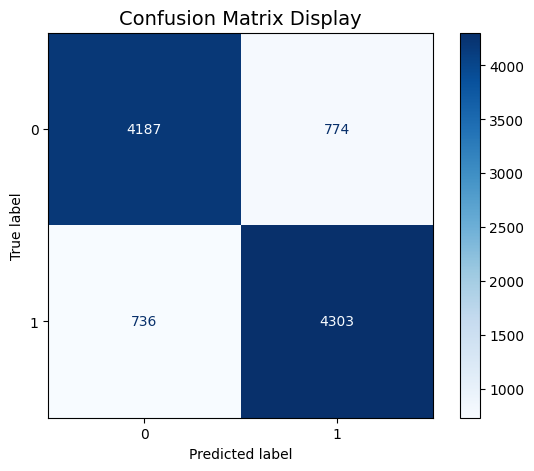

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def visualize_confusion_matrix(classifier, test_features, true_labels):
    predictions = classifier.predict(test_features)
    confusion_mat = confusion_matrix(true_labels, predictions)

    display_labels = [0, 1]  # Use your actual class labels

    display_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=display_labels)

    # Ensure it plots correctly
    plt.figure(figsize=(7, 5))
    display_matrix.plot(cmap="Blues", values_format='d', ax=plt.gca())  # Set correct axis
    plt.title('Confusion Matrix Display', fontsize=14)
    plt.show()

# Example usage:
visualize_confusion_matrix(nb_classifier, X_testing_set, y_testing_labels)


## Save the Model and Vectorizer

Persist the optimized model and vectorizer as files to streamline future sentiment predictions.

## vectorizer.pkl (TF-IDF Vectorizer)
1. Stores the trained TF-IDF vectorizer, which converts text data into numerical format used for model training.
2. Ensures new input reviews are processed the same way as the training data during deployment.
3. Prevents inconsistencies in feature representation, allowing the model to make accurate predictions on new reviews.

## sentiment_model.pkl (Best Trained Model)
1. Stores only the best-performing model (e.g., Logistic Regression) based on accuracy, discarding the other trained models.
2. Eliminates the need for retraining, allowing direct predictions on new reviews without re-running the entire pipeline.
3. Used in deployment by loading the saved model and applying it to vectorized input data for real-time sentiment analysis.

In [22]:
# Save the trained model and vectorizer for reuse
import joblib

# Save the best-performing model
joblib.dump(best_model, 'sentiment_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf_encoder, 'vectorizer.pkl')

print("\nModel and vectorizer saved successfully as 'sentiment_model.pkl' and 'vectorizer.pkl'.")



Model and vectorizer saved successfully as 'sentiment_model.pkl' and 'vectorizer.pkl'.
